In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve 
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('dataset/Breadth_Conversion.csv')

In [3]:
data

,S.No.,Breadth(a),Breadth(b),mean width,Original Width
0,0,36.274375,37.332708,73.607083,3.09
1,1,39.422917,38.682083,78.105000,3.17
2,2,34.951458,34.501667,69.453125,3.03
3,3,34.528125,33.602083,68.130208,3.09
4,4,39.131875,35.004375,74.136250,3.35
...,...,...,...,...,...
329,329,36.856458,37.332708,74.189167,3.23
330,330,33.946042,35.930417,69.876458,3.13
331,331,38.708542,37.306250,76.014792,3.00
332,332,36.856458,35.480625,72.337083,3.36


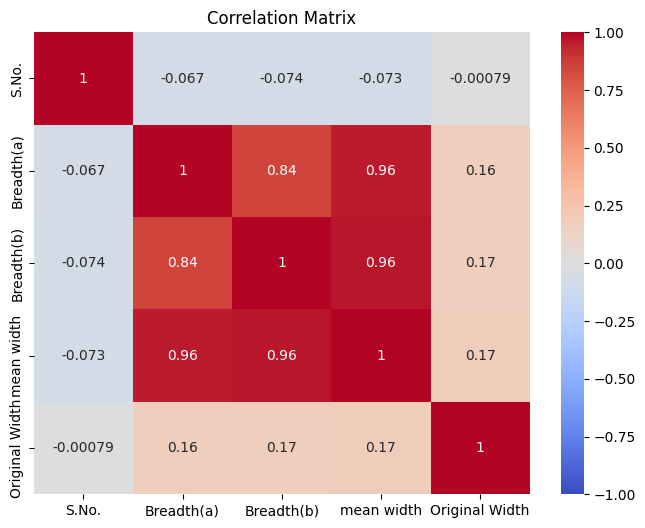

In [4]:
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [84]:
# X = data[['mean width']]
# y = data['Original Width']
X = data.drop('Original Width', axis=1).values
y = data['Original Width'].values

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=36) 

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [87]:
alpha_values = np.logspace(-3, 0, 100)
model = Lasso()
param_grid = {'alpha':alpha_values}
mse_scoring = make_scorer(mean_squared_error, greater_is_better = False)
r2_scoring = make_scorer(r2_score, greater_is_better = True)
scorers = {
    'mse': mse_scoring,
    'r2': r2_scoring
}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=5, scoring=scorers, refit='r2', n_jobs=-1, verbose=2)

In [88]:
grid_search.fit(X_train_scaled, Y_train)
best_alpha = grid_search.best_params_
print(f'Best alpha value: {best_alpha}')
best_lasso_model = grid_search.best_estimator_
best_lasso_model.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best alpha value: {'alpha': 0.007564633275546291}


Lasso(alpha=0.007564633275546291)

In [89]:
Y_pred = best_lasso_model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
r2= r2_score(Y_test, Y_pred)
print(f'R-squared error: {r2}')
rmse = np.sqrt(mse)
print(f'Root Mean Sqaured Error: {rmse}') 
# mae = mean_absolute_error(Y_test, Y_pred)
# print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.02367058043270944
R-squared error: 0.02299025022221257
Root Mean Sqaured Error: 0.15385246320000678


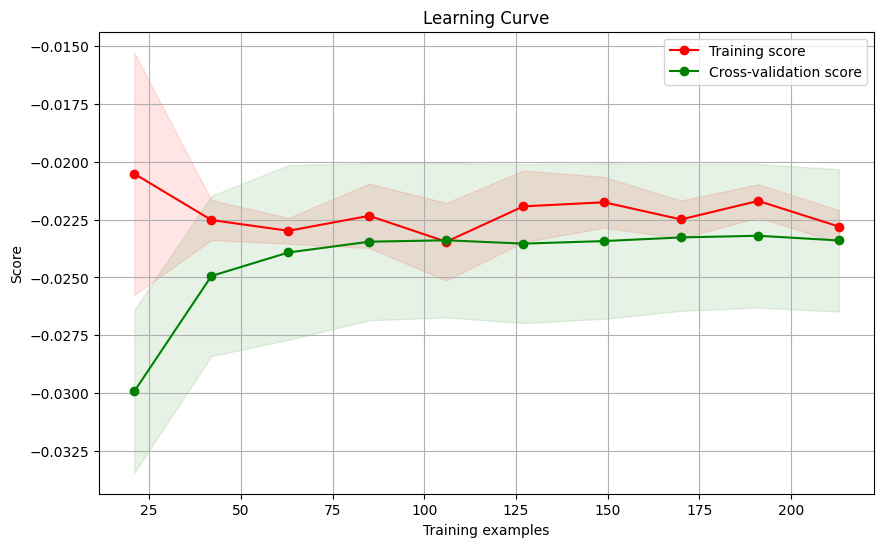

In [91]:
def plot_learning_curve(estimator, X, y, cv, scoring, n_jobs):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plotting the learning curve for Lasso regression
plot_learning_curve(best_lasso_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



In [18]:
joblib.dump(best_lasso_model,'Width_predictor.joblib')

['Width_predictor.joblib']

In [45]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
# Here we use a hypothetical dataset 'data.csv' with features in 'X' and target in 'y'
data = pd.read_csv('dataset/Breadth_Conversion.csv')
X1 = data.drop(['S.No.', 'Breadth(a)', 'Breadth(b)', 'Original Width'], axis=1).values
# X1 = data[['Breadth(a)','Breadth(b)','mean width']].values
y1 = data['Original Width'].values

# Define the model
model_LR = LinearRegression()
model_Lasso = Lasso(alpha=1.0)
model_Ridge = Ridge(alpha=1.0)
model_ElasticNet = ElasticNet(alpha=1.0, l1_ratio=0.5)

models = {'Linear Regression': model_LR, 'Lasso Regression': model_Lasso, 'Ridge Regression': model_Ridge, 'Elastic Net': model_ElasticNet}

# Define the number of folds
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Lists to store the scores for each fold
training_errors= []
validation_errors = []
training_r2 = []
validation_r2 = []
i = 1
j = 0
name = []

model_LR_mse = []
model_LR_r2 = []
model_Lasso_mse = []
model_Lasso_r2 = []
model_Ridge_mse = []
model_Ridge_r2 = []
model_ElasticNet_mse = []
model_ElasticNet_r2 = []

model_eval = [model_LR_mse, model_LR_r2, model_Lasso_mse, model_Lasso_r2, model_Ridge_mse, model_Ridge_r2, model_ElasticNet_mse, model_ElasticNet_r2]

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X1):
    
    X_train, X_val = X1[train_index], X1[val_index]
    y_train, y_val = y1[train_index], y1[val_index]
    
    print("Epoch:", i)
    i=i+1
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        # print(f'{name}:')
        # print(f'  Mean Squared Error: {mse}')
        # print(f'  R^2 Score: {r2}\n')
        if model == model_LR:
            model_LR_mse.append(mse)
            model_LR_r2.append(r2)
        elif model == model_Lasso:
            model_Lasso_mse.append(mse)
            model_Lasso_r2.append(r2)
        elif model == model_Ridge:
            model_Ridge_mse.append(mse)
            model_Ridge_r2.append(r2)
        elif model == model_ElasticNet:
            model_ElasticNet_mse.append(mse)
            model_ElasticNet_r2.append(r2)

    # Train the model
    # model_LR.fit(X_train, y_train)
    
    # Make predictions
    # y_train_pred = model_LR.predict(X_train)
    # y_val_pred = model_LR.predict(X_val)
    
    # Calculate and store the errors
#     train_error = mean_squared_error(y_train, y_train_pred)
#     val_error = mean_squared_error(y_val, y_val_pred)
    
#     train_r2 = r2_score(y_train, y_train_pred)
#     val_r2 = r2_score(y_val, y_val_pred)
    
#         training_errors.append(train_error)
#         validation_errors.append(val_error)

#         training_r2.append(train_r2)
#         validation_r2.append(val_r2)

    # Calculate average errors
#     avg_train_error = np.mean(training_errors)
#     avg_val_error = np.mean(validation_errors)

#     avg_train_r2 = np.mean(training_r2)
#     avg_val_r2 = np.mean(validation_r2)

#     print(f'Average Training Error: {avg_train_error}')
#     print(f'Average Validation Error: {avg_val_error}')


#     print(f'Average Training Error: {avg_train_r2}')
#     print(f'Average Validation Error: {avg_val_r2}')
    
avg_mse_error_LR = np.mean(model_LR_mse)
avg_r2_error_LR = np.mean(model_LR_r2)

avg_mse_error_Lasso = np.mean(model_Lasso_mse)
avg_r2_error_Lasso = np.mean(model_Lasso_r2)

avg_mse_error_Ridge = np.mean(model_Ridge_mse)
avg_r2_error_Ridge = np.mean(model_Ridge_r2)

avg_mse_error_ElasticNet = np.mean(model_ElasticNet_mse)
avg_r2_error_ElasticNet = np.mean(model_ElasticNet_r2)


print("LR mse:", avg_mse_error_LR, " LR_r2:", avg_r2_error_LR)
print("Lasso mse:", avg_mse_error_Lasso, " Lasso_r2:", avg_r2_error_Lasso)
print("Ridge mse:", avg_mse_error_Ridge, " Ridge_r2:", avg_r2_error_Ridge)
print("ElasticNet mse:", avg_mse_error_ElasticNet, " LR_ElasticNet:", avg_r2_error_ElasticNet)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
LR mse: 0.023357621424718627  LR_r2: -0.013074112475770316
Lasso mse: 0.023876429907488443  Lasso_r2: -0.04609745617275771
Ridge mse: 0.023357580532555038  Ridge_r2: -0.01307435081482521
ElasticNet mse: 0.023876429907488443  LR_ElasticNet: -0.04609745617275771


In [46]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
# Here we use a hypothetical dataset 'data.csv' with features in 'X' and target in 'y'
data = pd.read_csv('dataset/Breadth_Conversion.csv')
# X1 = data.drop(['filename','Original Length'], axis=1).values
X1 = data[['mean width']].values
y1 = data['Original Width'].values

# Define the model
model_LR = LinearRegression()

# Define the number of folds
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Lists to store the scores for each fold
training_errors = []
validation_errors = []
training_r2 = []
validation_r2 = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X1):
    X_train, X_val = X1[train_index], X1[val_index]
    y_train, y_val = y1[train_index], y1[val_index]
    
    # Train the model
    model_LR.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model_LR.predict(X_train)
    y_val_pred = model_LR.predict(X_val)
    
    # Calculate and store the errors
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    training_errors.append(train_error)
    validation_errors.append(val_error)
    
    training_r2.append(train_r2)
    validation_r2.append(val_r2)

# Calculate average errors
avg_train_error = np.mean(training_errors)
avg_val_error = np.mean(validation_errors)

avg_train_r2 = np.mean(training_r2)
avg_val_r2 = np.mean(validation_r2)

print(f'Average Training Error: {avg_train_error}')
print(f'Average Validation Error: {avg_val_error}')


print(f'Average Training Error: {avg_train_r2}')
print(f'Average Validation Error: {avg_val_r2}')



Average Training Error: 0.022956850365642795
Average Validation Error: 0.023357621424718627
Average Training Error: 0.0304007273893818
Average Validation Error: -0.013074112475770316


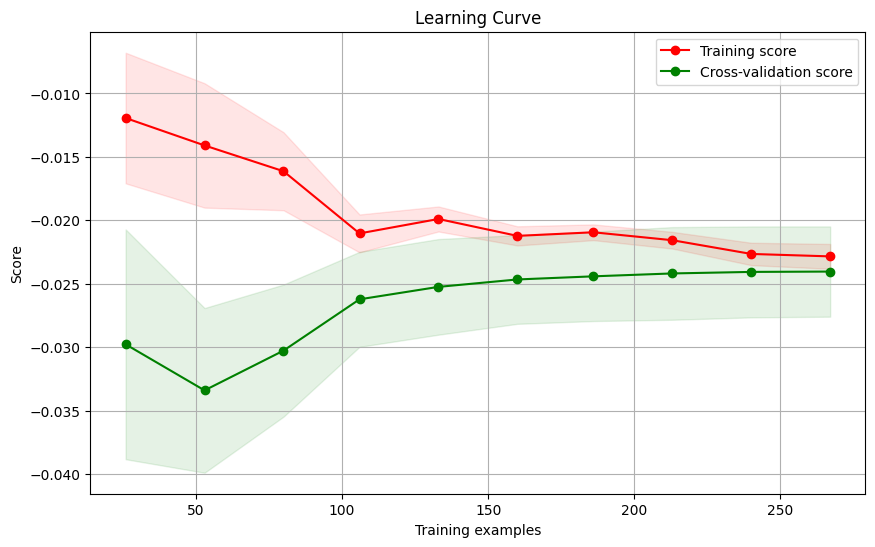

In [47]:
def plot_learning_curve(estimator, X, y, cv, scoring, n_jobs):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plotting the learning curve for Lasso regression
plot_learning_curve(model_LR, X1, y1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)



In [25]:
joblib.dump(model_LR,'Width_predictor.joblib')

['Width_predictor.joblib']

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your data
# Here we use a hypothetical dataset 'data.csv' with features in 'X' and target in 'y'
data = pd.read_csv('dataset/Breadth_Conversion.csv')
X = data.drop('Original Width', axis=1).values
y = data['Original Width'].values

# Define the model
model_lasso = Lasso()

# Define the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# Lists to store the scores for each fold
training_errors = []
validation_errors = []
training_r2 = []
validation_r2 = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate and store the errors
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    training_errors.append(train_error)
    validation_errors.append(val_error)
    
    training_r2.append(train_r2)
    validation_r2.append(val_r2)

# Calculate average errors
avg_train_error = np.mean(training_errors)
avg_val_error = np.mean(validation_errors)

avg_train_r2 = np.mean(training_r2)
avg_val_r2 = np.mean(validation_r2)

print(f'Average Training Error: {avg_train_error}')
print(f'Average Validation Error: {avg_val_error}')

print(f'Average Training Error: {avg_train_r2}')
print(f'Average Validation Error: {avg_val_r2}')


Average Training Error: 0.023629811065698274
Average Validation Error: 0.024123229539586764
Average Training Error: 0.00026006328702994353
Average Validation Error: -0.0552573307129622


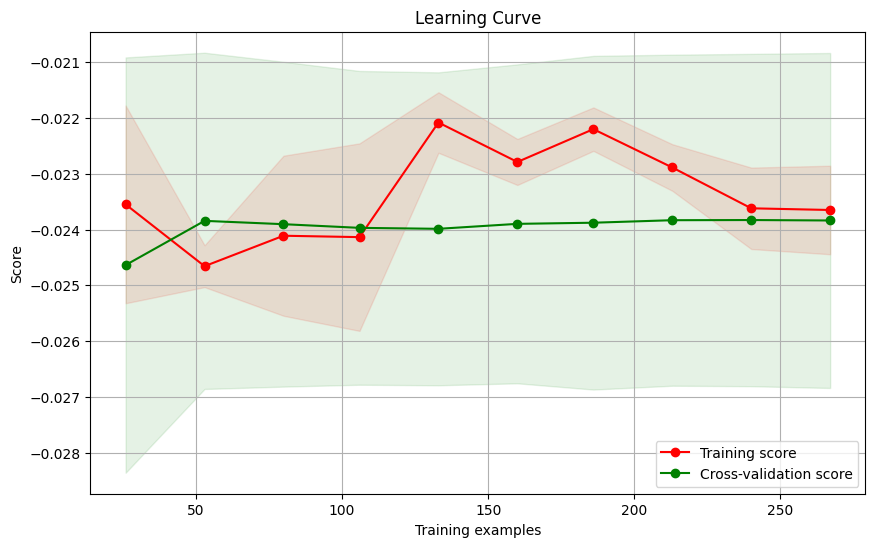

In [98]:
def plot_learning_curve(estimator, X, y, cv, scoring, n_jobs):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Plotting the learning curve for Lasso regression
plot_learning_curve(model_lasso, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

